To improve code readability and make it easier to reference specific lines, you can show line numbers in Google Colaboratory by following these steps:

* Tools -> Settings -> Editor -> show line numbers

Alternatively, you can enable line numbers using keyboard shortcuts:
* In the Google Colaboratory notebook, press Ctrl + M + L (on Windows/Linux) or Cmd + M + L (on macOS).
This keyboard shortcut will toggle the display of line numbers in the code editor.

# Import Library & Connect to Gdrive

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from numpy import fft
import pylab as pl
from matplotlib import pyplot
from sklearn.metrics import r2_score

# Suhu Sealing Vertikal Bawah

## Load Data

In [ ]:
# Load data from Excel file

file_path = "/content/data_mean187window_vbtemp.csv"

data = pd.read_csv(file_path)
data.head()

,datetime,suhu_sealing_vertical_bawah
0,2023-09-01 06:29:25,209.7
1,2023-09-01 06:31:14,209.7
2,2023-09-01 06:36:14,209.7
3,2023-09-01 06:41:14,209.7
4,2023-09-01 06:46:14,209.7


## Suhu Sealing Vertical Bawah Visualization

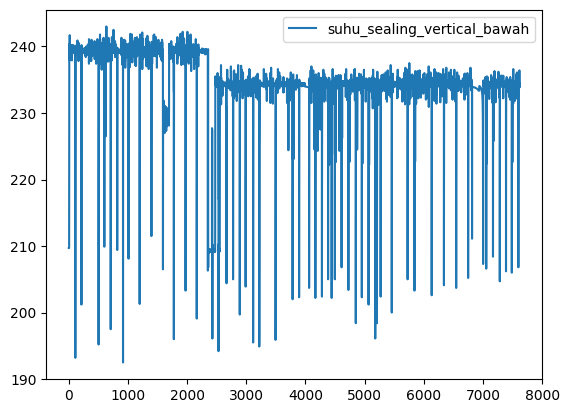

In [ ]:
data.plot()
pyplot.show()

## Model Training

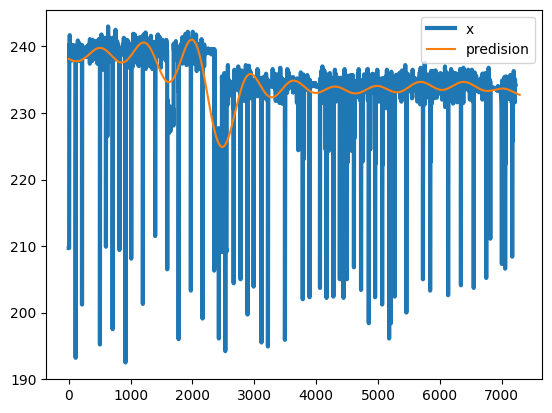

In [ ]:
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)
    x_notrend = x - p[0] * t
    x_freqdom = fft.fft(x_notrend)
    f = fft.fftfreq(n)
    indexes = list(range(n))

    indexes.sort(key=lambda i: np.absolute(f[i]))

    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n
        phase = np.angle(x_freqdom[i])
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t


if __name__ == "__main__":
    x = np.array(data.iloc[:7222]['suhu_sealing_vertical_bawah'])
    n_predict = 70
    extrapolation = fourierExtrapolation(x, n_predict)
    pl.plot(np.arange(0, x.size), x, 'C0', label='x', linewidth=3)
    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'C1',
            label='predision')
    pl.legend()
    pl.show()


## Model Testing

In [ ]:
# Perform prediction for the same time range as the validation data

extrapolation = fourierExtrapolation(x, n_predict)
print(f"Ekstrapolasi nilai 70 baris ke depan: {extrapolation}")

Ekstrapolasi nilai 70 baris ke depan: [238.12624045 238.12155178 238.11687523 ... 232.73424435 232.73133003
 232.72845603]


## Metrics Evaluation for Data Testing

In [ ]:
# Calculate difference between original and predicted
y = data.iloc[7222:]['suhu_sealing_vertical_bawah']
errors = extrapolation[-400:] - y

# Mean squared error
mse = np.mean(errors**2)

x[x == 0] = 0.0001
# Root mean squared error
rmse = np.sqrt(mse)

# Root mean squared percentage error
rmspe = np.sqrt(np.mean( (errors/y)**2 ))

# Mean absolute percentage error
mape = np.mean(np.abs(errors / y)) * 100
r2 = r2_score(y, extrapolation[-400:])
print('R2:', r2)
print('MSE:', mse)
print('RMSE:', rmse)
#print('RMSPE:', rmspe)
print('MAPE:', mape)

R2: -0.0211742565117381
MSE: 10.686458028160205
RMSE: 3.269014840614861
MAPE: 0.6177360197615878


## Forecast for the Next 1 Hours

In [ ]:

# Creating a DataFrame for 24-hour ahead predictions with a 5-minute interval
data.tail(-400)

,datetime,suhu_sealing_vertical_bawah
400,2023-09-07 13:52:35,238.6
401,2023-09-07 13:57:35,240.0
402,2023-09-07 14:02:35,239.9
403,2023-09-07 14:07:35,239.3
404,2023-09-07 14:12:35,239.2
...,...,...
7617,2023-11-29 07:38:19,233.9
7618,2023-11-29 07:43:19,234.2
7619,2023-11-29 07:48:19,234.5
7620,2023-11-29 07:53:19,234.4


# Suhu Sealing Vertikal Atas

## Load Data

In [ ]:
# Load data from csv file

file_path = "/content/data_mean187window_vatemp.csv"

datatas = pd.read_csv(file_path)

datatas.head()

,datetime,suhu_sealing_vertical_atas
0,2023-09-01 06:29:25,198.8
1,2023-09-01 06:31:14,198.8
2,2023-09-01 06:36:14,198.8
3,2023-09-01 06:41:14,198.8
4,2023-09-01 06:46:14,198.8


## Suhu Sealing Vertical Atas Visualization

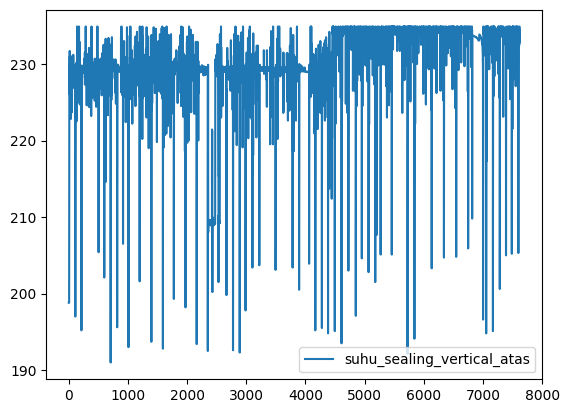

In [ ]:
datatas.plot()
pyplot.show()

## Model Training

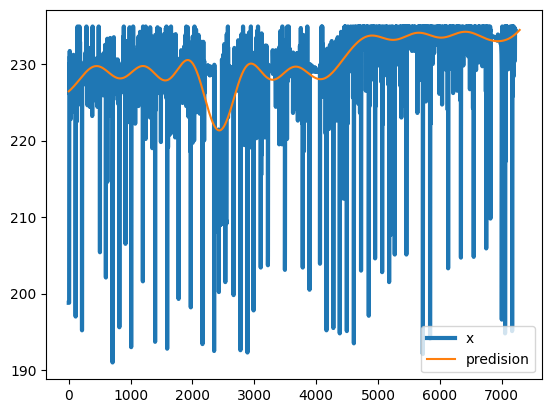

In [ ]:
def fourierExtrapolation1(x, n_predict):
    n = x.size
    n_harm = 10
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)
    x_notrend = x - p[0] * t
    x_freqdom = fft.fft(x_notrend)
    f = fft.fftfreq(n)
    indexes = list(range(n))

    indexes.sort(key=lambda i: np.absolute(f[i]))

    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n
        phase = np.angle(x_freqdom[i])
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t


if __name__ == "__main__":
    x = np.array(datatas.iloc[:7222]['suhu_sealing_vertical_atas'])
    n_predict = 70
    extrapolation = fourierExtrapolation1(x, n_predict)
    pl.plot(np.arange(0, x.size), x, 'C0', label='x', linewidth=3)
    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'C1',
            label='predision')
    pl.legend()
    pl.show()


## Model Testing

In [ ]:
# Perform prediction for the same time range as the validation data

extrapolation1 = fourierExtrapolation1(x, n_predict)
print(f"Ekstrapolasi nilai 70 baris ke depan: {extrapolation1}")

Ekstrapolasi nilai 70 baris ke depan: [226.42507245 226.43207555 226.43910583 ... 234.42912438 234.43779305
 234.44648318]


## Metrics Evaluation for Data Testing

In [ ]:
# Calculate difference between original and predicted
y = datatas.iloc[7222:]['suhu_sealing_vertical_atas']
errors = extrapolation[-400:] - y

# Mean squared error
mse = np.mean(errors**2)

x[x == 0] = 0.0001
# Root mean squared error
rmse = np.sqrt(mse)

# Root mean squared percentage error
rmspe = np.sqrt(np.mean( (errors/y)**2 ))

# Mean absolute percentage error
mape = np.mean(np.abs(errors / y)) * 100
r2 = r2_score(y, extrapolation[-400:])
print('R2:', r2)
print('MSE:', mse)
print('RMSE:', rmse)
#print('RMSPE:', rmspe)
print('MAPE:', mape)


R2: -0.020291128250567114
MSE: 14.442332794262592
RMSE: 3.8003069342176286
MAPE: 0.71799057524602


## Forecast for the Next 1 Hours

In [ ]:
# Creating a DataFrame for 24-hour ahead predictions with a 5-minute interval
data.tail(-400)

,datetime,suhu_sealing_vertical_bawah
400,2023-09-07 13:52:35,238.6
401,2023-09-07 13:57:35,240.0
402,2023-09-07 14:02:35,239.9
403,2023-09-07 14:07:35,239.3
404,2023-09-07 14:12:35,239.2
...,...,...
7617,2023-11-29 07:38:19,233.9
7618,2023-11-29 07:43:19,234.2
7619,2023-11-29 07:48:19,234.5
7620,2023-11-29 07:53:19,234.4
